# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [2]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt


### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [3]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.935, 即時現金賣出: 30.605


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [4]:
# print(html)
rate_tables = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
for rate_table in rate_tables:
    cur = rate_table.find('div',{'class':'visible-phone print_hide'}).text.strip()
#     print(rate_table)
    print('============')
    print(cur+'\n')
    buy = rate_table.find('td',{'data-table':'本行現金買入'}).text.strip()
    sell = rate_table.find('td',{'data-table':'本行現金賣出'}).text.strip()
    print("即時現金買入: %s, 即時現金賣出: %s" % (buy, sell))

美金 (USD)

即時現金買入: 29.935, 即時現金賣出: 30.605
港幣 (HKD)

即時現金買入: 3.73, 即時現金賣出: 3.934
英鎊 (GBP)

即時現金買入: 38.87, 即時現金賣出: 40.99
澳幣 (AUD)

即時現金買入: 20.48, 即時現金賣出: 21.26
加拿大幣 (CAD)

即時現金買入: 22.54, 即時現金賣出: 23.45
新加坡幣 (SGD)

即時現金買入: 21.79, 即時現金賣出: 22.7
瑞士法郎 (CHF)

即時現金買入: 30.05, 即時現金賣出: 31.25
日圓 (JPY)

即時現金買入: 0.2701, 即時現金賣出: 0.2829
南非幣 (ZAR)

即時現金買入: -, 即時現金賣出: -
瑞典幣 (SEK)

即時現金買入: 2.85, 即時現金賣出: 3.37
紐元 (NZD)

即時現金買入: 19.48, 即時現金賣出: 20.33
泰幣 (THB)

即時現金買入: 0.881, 即時現金賣出: 1.069
菲國比索 (PHP)

即時現金買入: 0.5246, 即時現金賣出: 0.6576
印尼幣 (IDR)

即時現金買入: 0.00183, 即時現金賣出: 0.00253
歐元 (EUR)

即時現金買入: 32.97, 即時現金賣出: 34.31
韓元 (KRW)

即時現金買入: 0.02382, 即時現金賣出: 0.02772
越南盾 (VND)

即時現金買入: 0.00094, 即時現金賣出: 0.00144
馬來幣 (MYR)

即時現金買入: 6.189, 即時現金賣出: 7.833
人民幣 (CNY)

即時現金買入: 4.219, 即時現金賣出: 4.381


## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

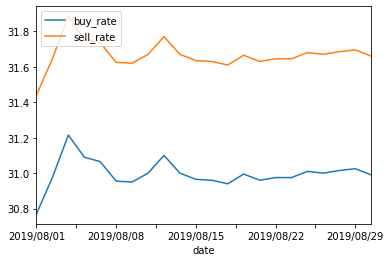

In [5]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2019-08")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

美金 (USD)

https://rate.bot.com.tw/xrt/quote/2019-12/USD


<Figure size 3600x3600 with 0 Axes>

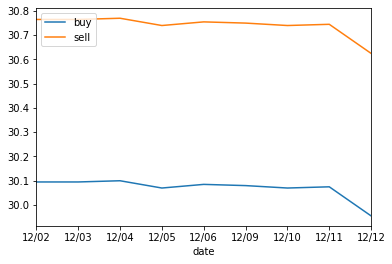

港幣 (HKD)

https://rate.bot.com.tw/xrt/quote/2019-12/HKD


<Figure size 3600x3600 with 0 Axes>

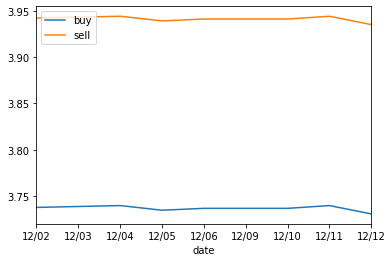

英鎊 (GBP)

https://rate.bot.com.tw/xrt/quote/2019-12/GBP


<Figure size 3600x3600 with 0 Axes>

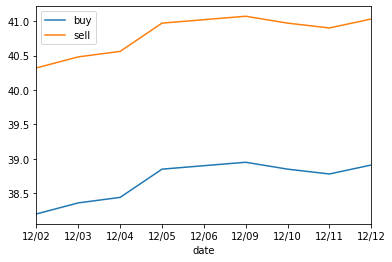

澳幣 (AUD)

https://rate.bot.com.tw/xrt/quote/2019-12/AUD


<Figure size 3600x3600 with 0 Axes>

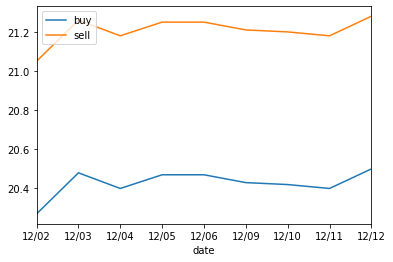

加拿大幣 (CAD)

https://rate.bot.com.tw/xrt/quote/2019-12/CAD


<Figure size 3600x3600 with 0 Axes>

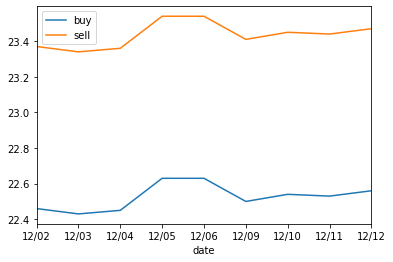

新加坡幣 (SGD)

https://rate.bot.com.tw/xrt/quote/2019-12/SGD


<Figure size 3600x3600 with 0 Axes>

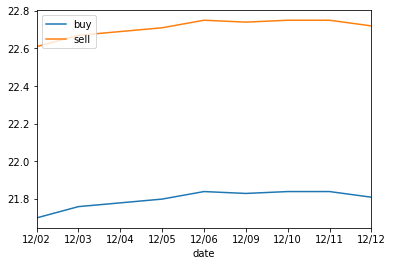

瑞士法郎 (CHF)

https://rate.bot.com.tw/xrt/quote/2019-12/CHF


<Figure size 3600x3600 with 0 Axes>

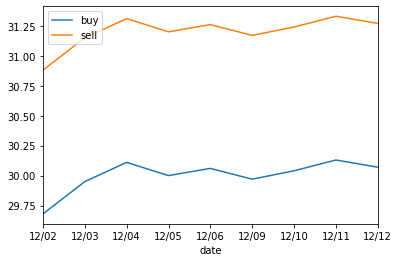

日圓 (JPY)

https://rate.bot.com.tw/xrt/quote/2019-12/JPY


<Figure size 3600x3600 with 0 Axes>

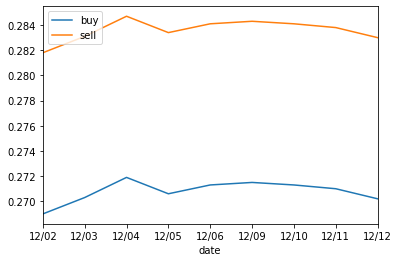

南非幣 (ZAR)

https://rate.bot.com.tw/xrt/quote/2019-12/ZAR


In [ ]:
rate_tables = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
for rate_table in rate_tables:
#     print(rate_table)
    curUrl = rate_table.find('td',{'data-table':'歷史匯率'}).a['href']
#     print(curUrl)
    curUrl = url[:url.rfind('/',)] + curUrl
    cur = rate_table.find('div',{'class':'visible-phone print_hide'}).text.strip()
    print('============')
    print(cur+'\n')
    
    quote_history_url = curUrl.replace('history','quote/2019-12')
    print(quote_history_url)
    res = requests.get(quote_history_url)
    res.encoding = 'utf-8'
    history = BeautifulSoup(res.text, "lxml")
    history_tables = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')
#     print(history_tables)
    buyList = list()
    sellList = list()
    timeList = list()
    for history_table in history_tables:
#         print(history_table.find('a'))
        buyList.append(float(history_table.find('td',{'class':'rate-content-cash text-right print_table-cell'}).text))
        sellList.append(float(history_table.find_all('td',{'class':'rate-content-cash text-right print_table-cell'})[1].text))
        date_string = history_table.find('a').text
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%M/%d')
        timeList.append(date)
#     print(buyList)

    History = pd.DataFrame({'date': timeList,
                            'buy':buyList,
                            'sell':sellList})
    History = History.set_index('date')
    History = History.sort_index(ascending=True)#案大小排序
    plt.figure(figsize=(50, 50))
    History[['buy','sell']].plot()  
    plt.legend(loc="upper left")
    plt.show()